# DeepSVDD  -  Deep One-Class Classification for outlier detection
### Deep One-Class Classifier with AutoEncoder (AE) is a type of neural networks for learning useful data representations in an unsupervised way. DeepSVDD trains a neural network while minimizing the volume of a hypersphere that encloses the network representations of the data, forcing the network to extract the common factors of variation. Similar to PCA, DeepSVDD could be used to detect outlying objects in the data by calculating the distance from center
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.deep_svdd

### Arguments that work with DeepSVDD  algorithm:
1. c=c,
2. use_ae=use_ae,
3. hidden_neurons
4. hidden_activation
5. output_activation
6. optimizer
7. epochs
8. batch_size
9. dropout_rate
10. l2_regularizer
11. validation_size
12. preprocessing
13. verbose
14. random_state
15. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=7, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took    39.878809 seconds
image downsampling       ...took     0.939491 seconds
image downsampling       ...took     1.408131 seconds
image downsampling       ...took     1.879312 seconds
image downsampling       ...took     2.348802 seconds
image downsampling       ...took     2.818147 seconds
image downsampling       ...took     3.286743 seconds
image downsampling       ...took     3.757618 seconds
image downsampling       ...took     4.811939 seconds
image downsampling       ...took     5.282448 seconds
image downsampling       ...took     5.760817 seconds
image downsampling       ...took     8.521243 seconds
image downsampling       ...took     9.571452 seconds
image downsampling       ...took    10.979136 seconds
image downsampling       ...took    13.747561 seconds
image downsampling       ...took    14.217508 seconds
image downsampling       ...took    14.688486 seconds
image downsampling       ...took    15.736838 seconds
image downsampling       ...

2022-08-31 22:55:27.761780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-31 22:55:30.086010: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-08-31 22:55:30.316242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-31 22:55:30.316344: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-31 22:55:30.336951: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-08-31 22:55:30.337012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                262144    
_________________________________________________________________
net_output (Dense)           (None, 32)                2048      
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 32)                0         
_________________________________________________________________
tf.math.pow_1 (TFOpLambda)   (None, 32)                0         
_________________________________________________________________
tf.math.reduce_sum_1 (TFOpLa (None,)                   0         
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL ()                        0   

Epoch 68/100
3/3 [==============================] - 0s 10ms/step - loss: 4.0965 - val_loss: 8.6598
Epoch 69/100
3/3 [==============================] - 0s 10ms/step - loss: 3.9458 - val_loss: 9.7986
Epoch 70/100
3/3 [==============================] - 0s 10ms/step - loss: 3.8314 - val_loss: 8.7089
Epoch 71/100
3/3 [==============================] - 0s 10ms/step - loss: 3.9863 - val_loss: 11.4162
Epoch 72/100
3/3 [==============================] - 0s 10ms/step - loss: 4.4839 - val_loss: 11.3403
Epoch 73/100
3/3 [==============================] - 0s 10ms/step - loss: 5.4581 - val_loss: 9.9202
Epoch 74/100
3/3 [==============================] - 0s 10ms/step - loss: 5.0033 - val_loss: 9.7231
Epoch 75/100
3/3 [==============================] - 0s 10ms/step - loss: 5.0404 - val_loss: 15.8293
Epoch 76/100
3/3 [==============================] - 0s 10ms/step - loss: 6.1073 - val_loss: 9.3980
Epoch 77/100
3/3 [==============================] - 0s 11ms/step - loss: 4.9009 - val_loss: 10.1004
Epoch 

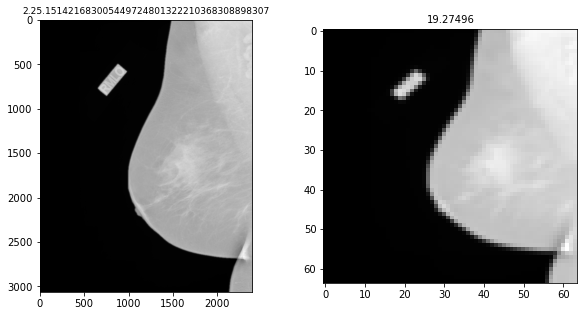

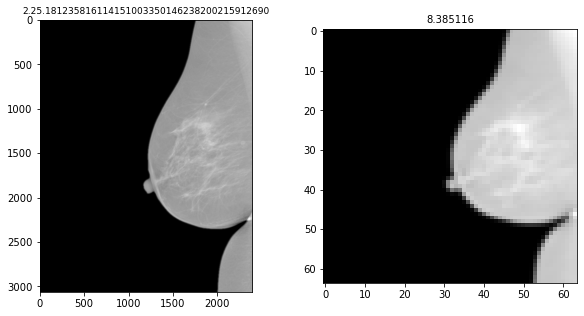

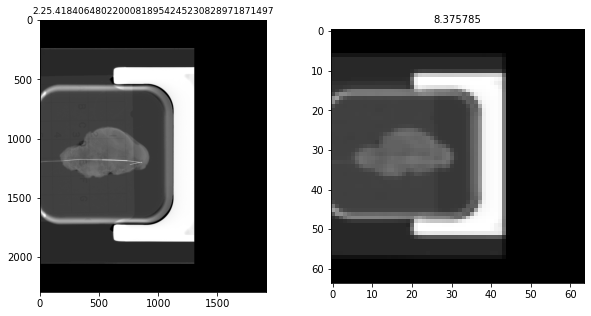

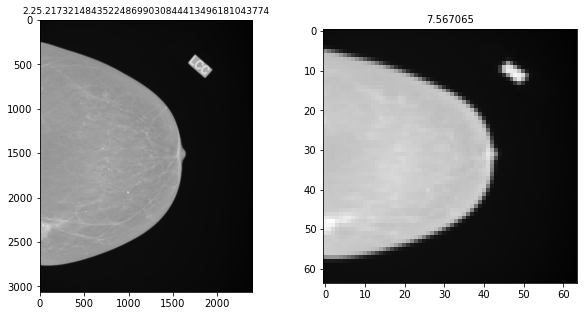

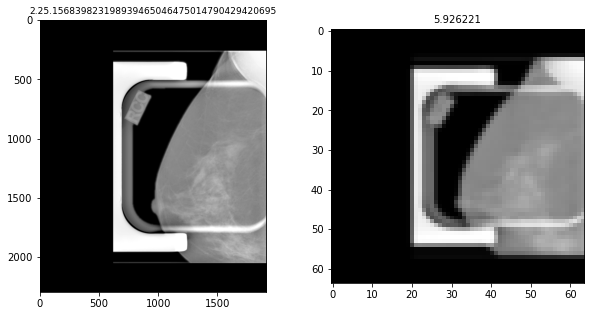

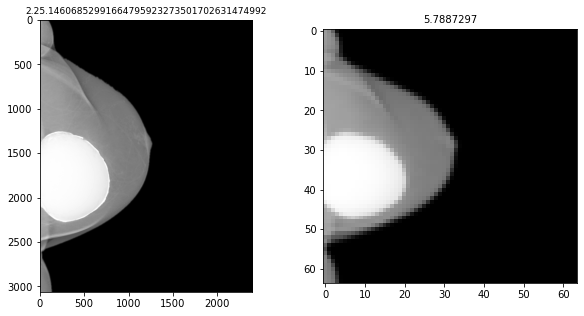

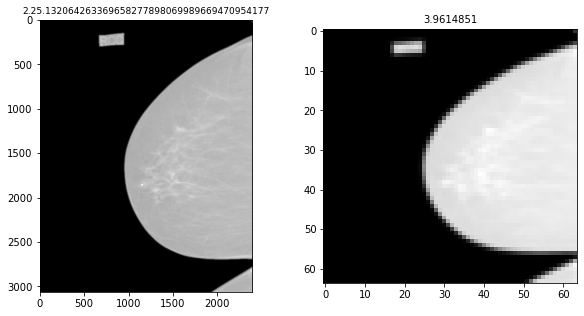

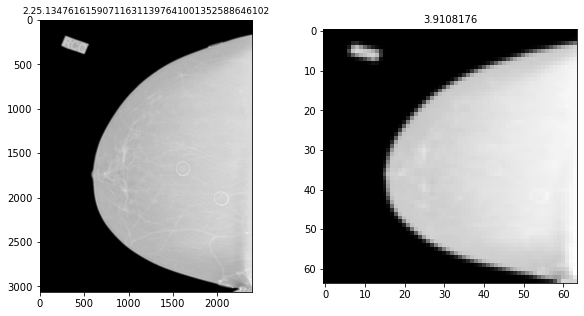

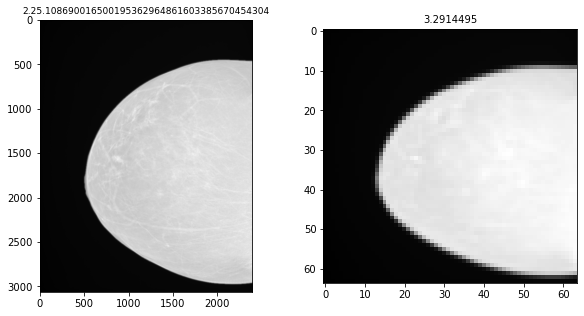

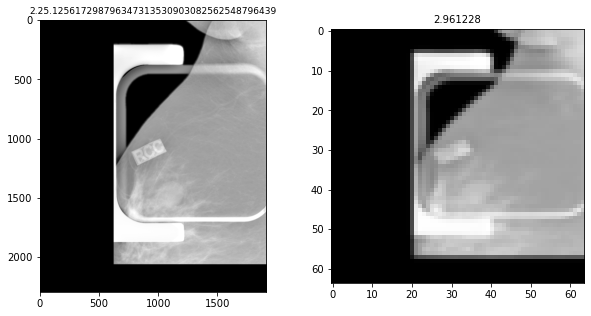

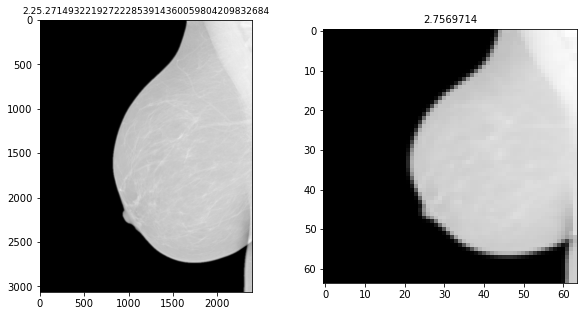

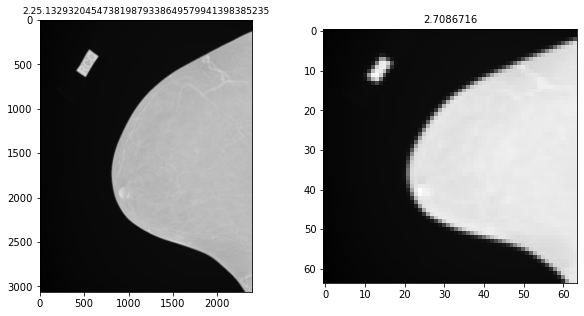

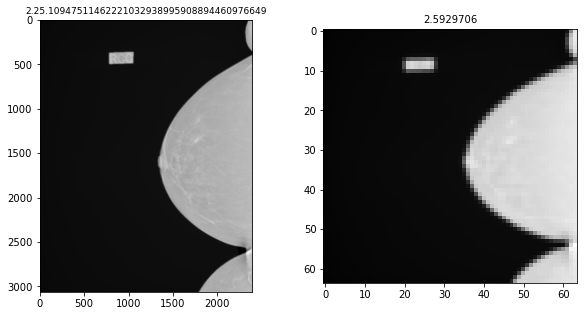

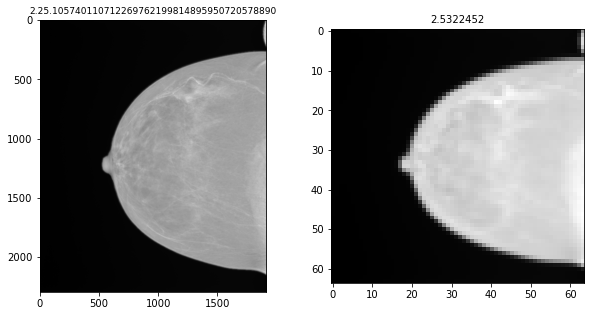

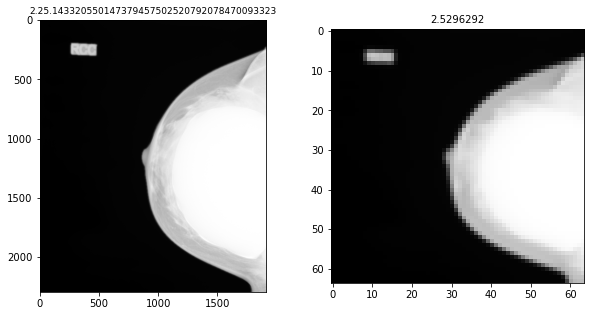

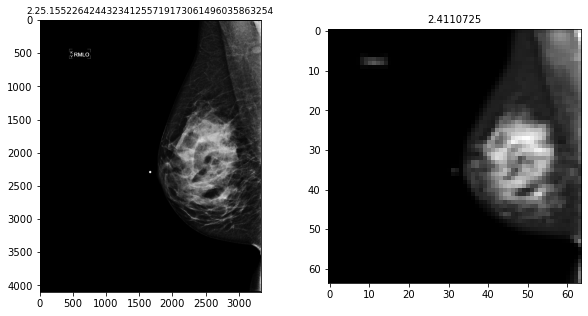

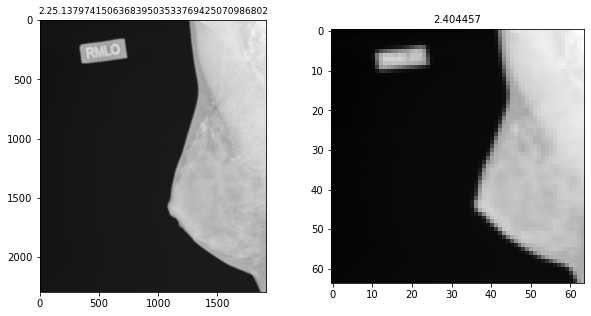

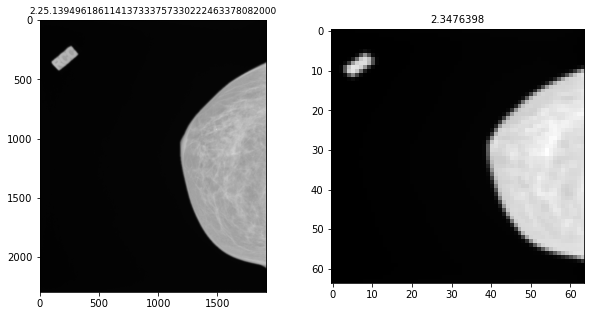

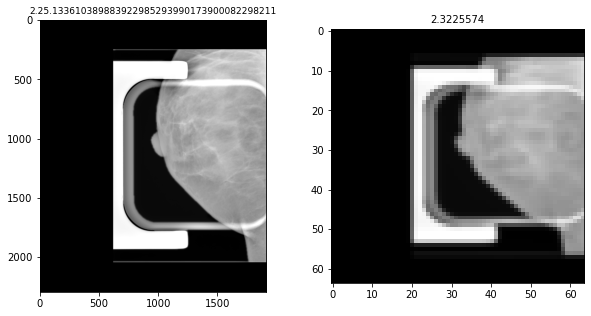

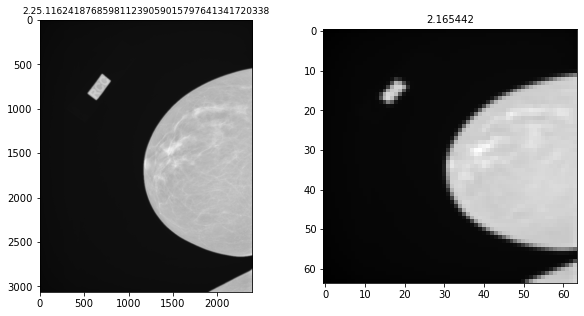

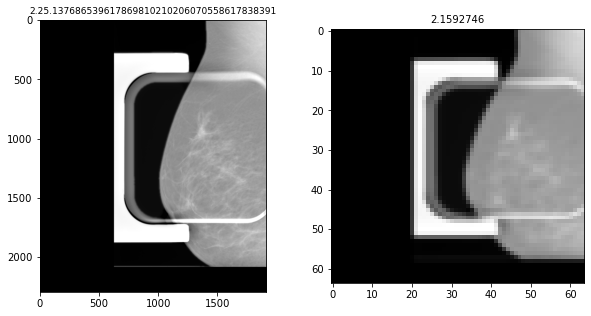

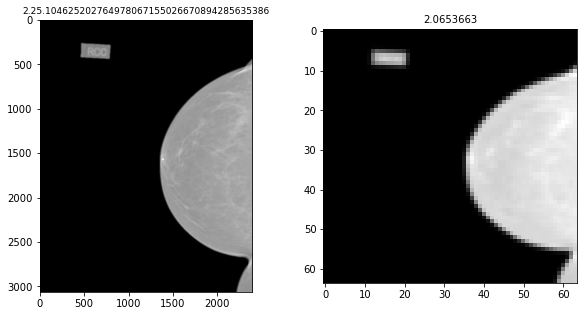

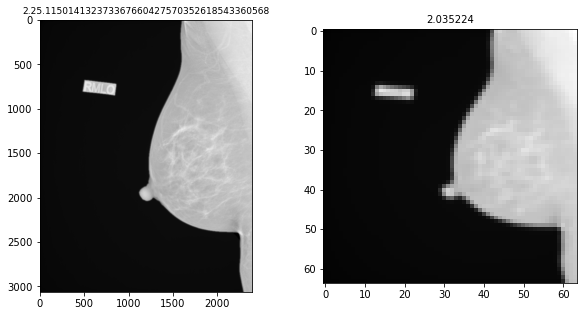

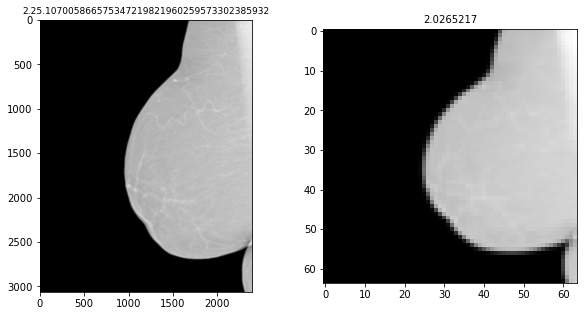

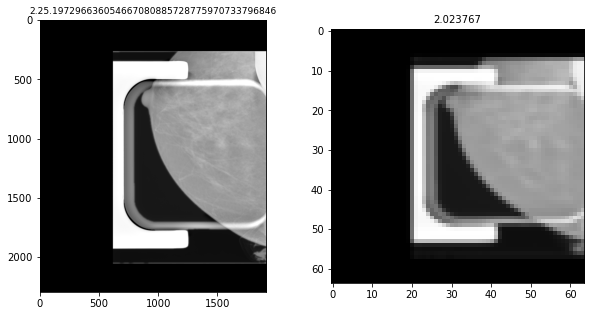

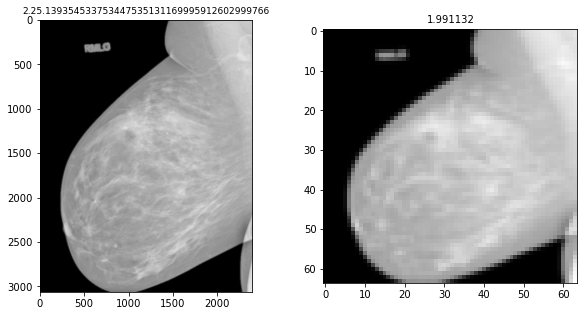

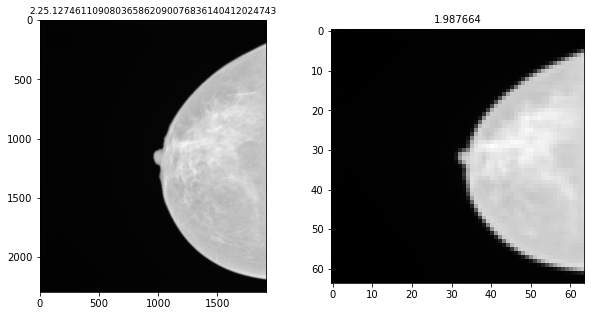

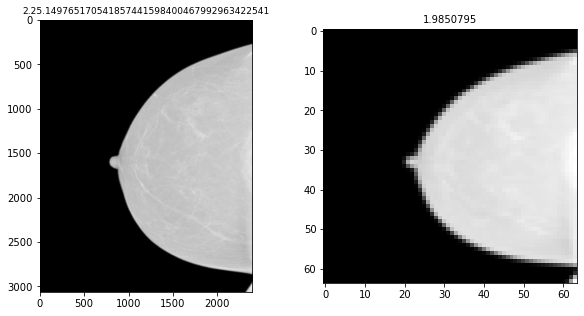

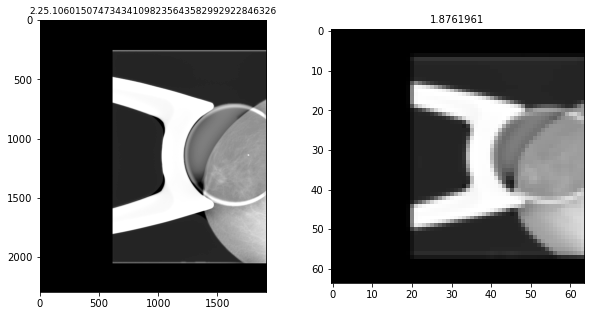

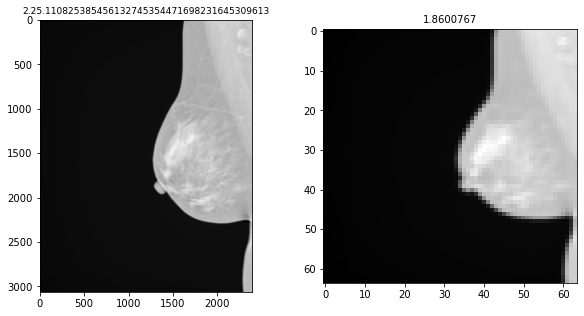

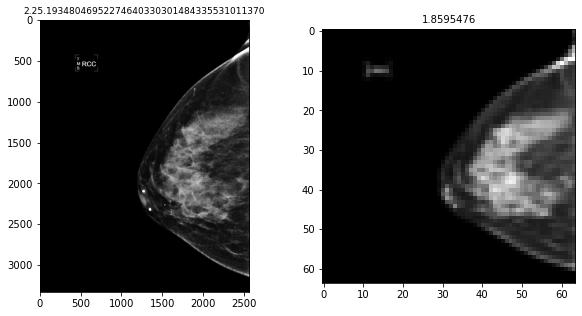

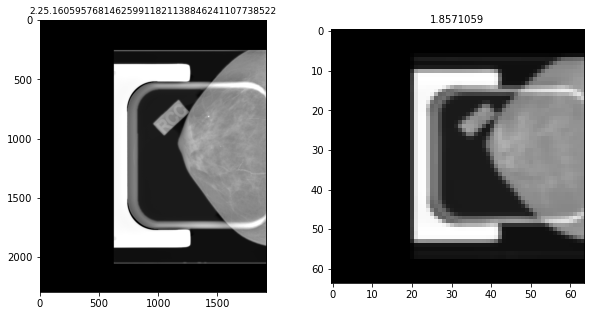

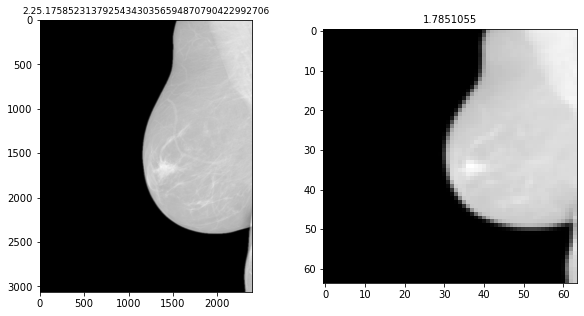

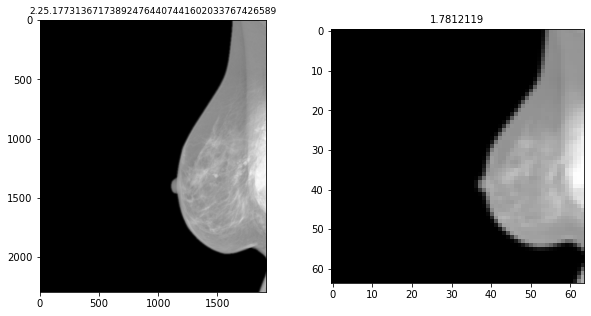

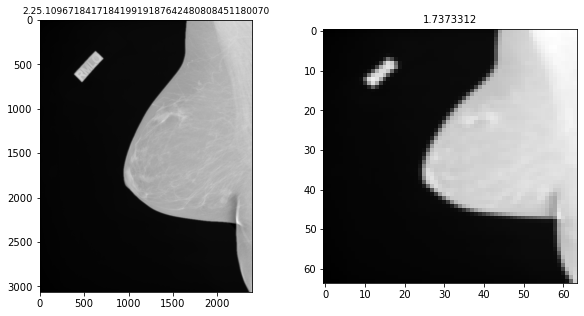

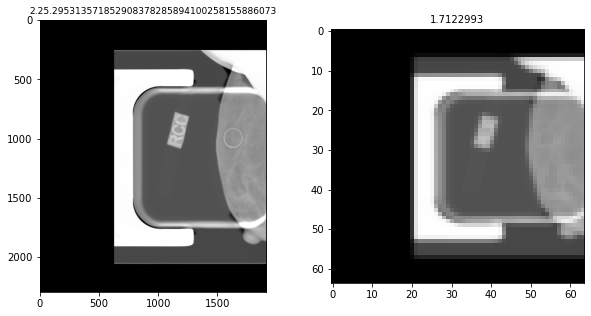

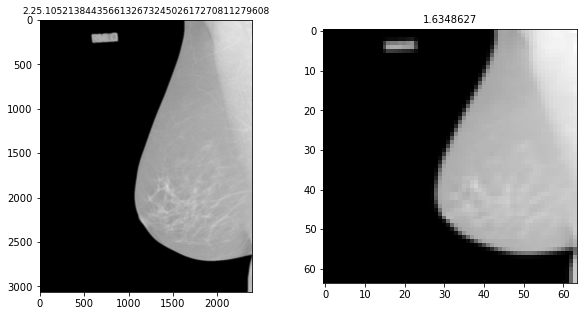

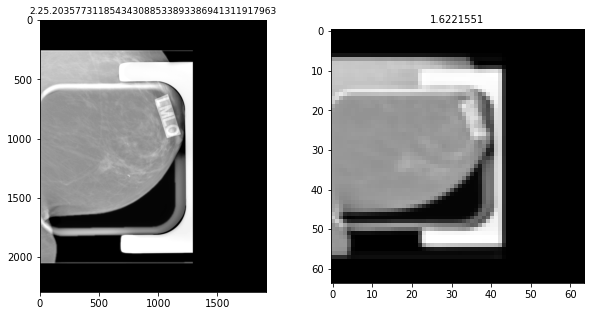

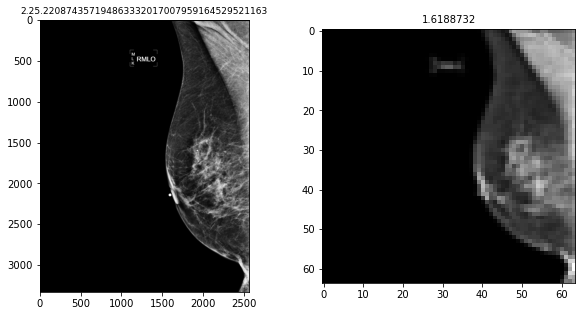

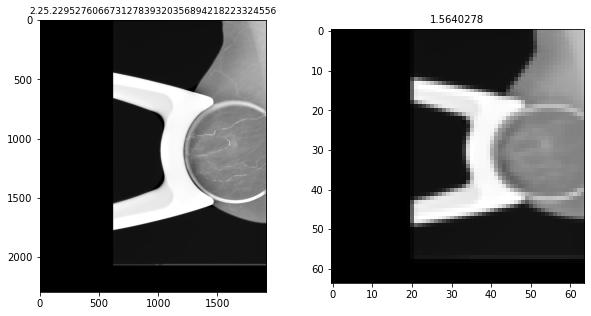

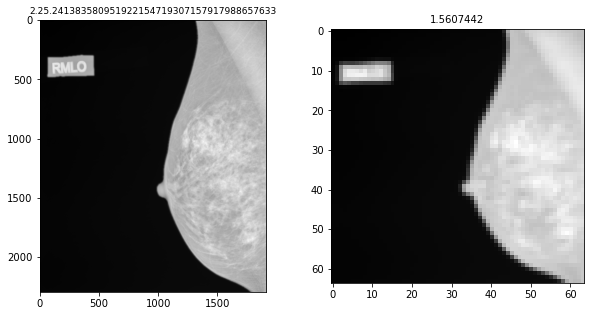

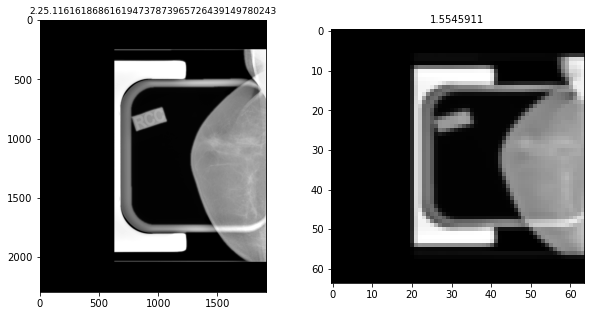

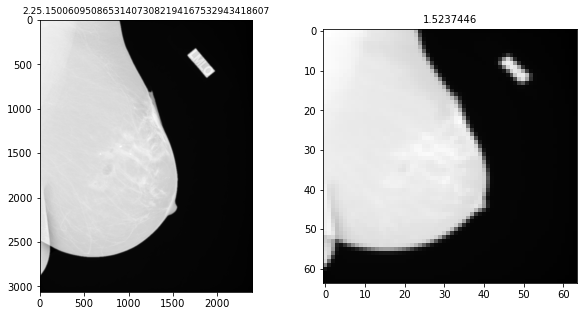

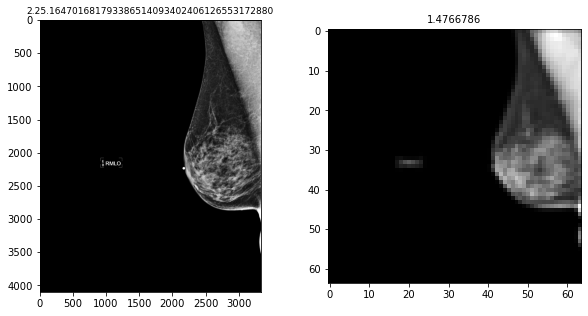

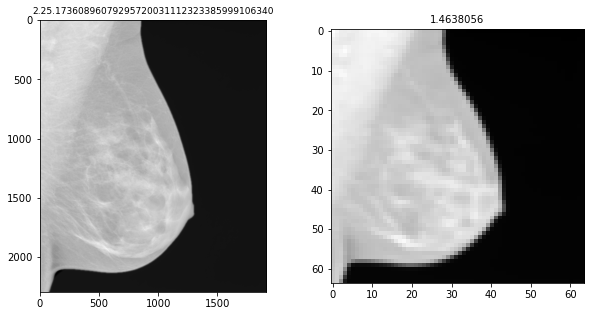

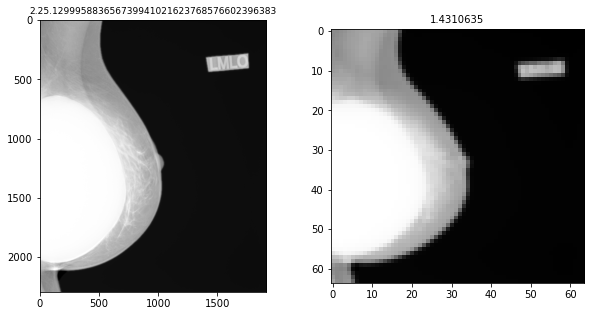

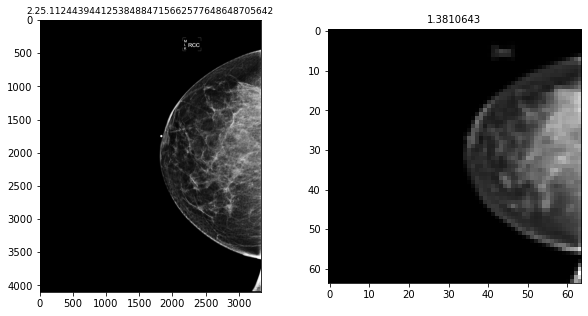

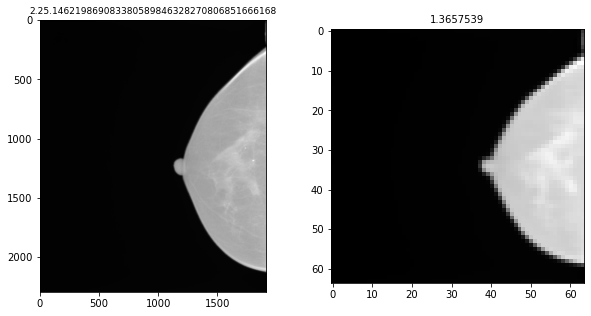

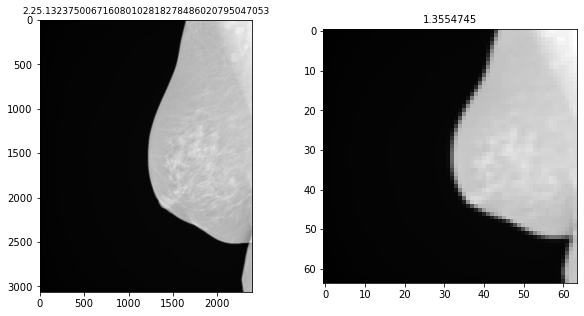

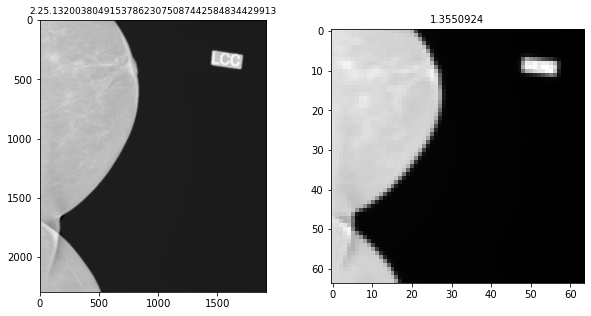

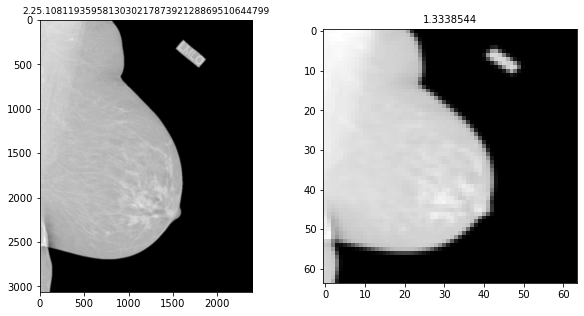

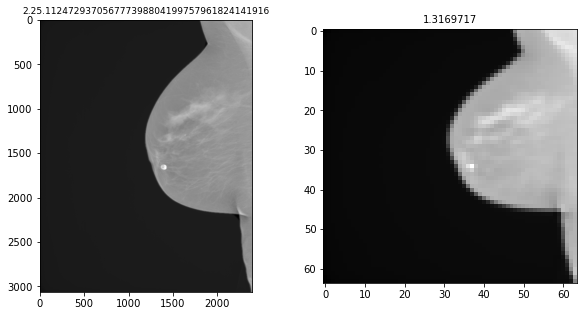

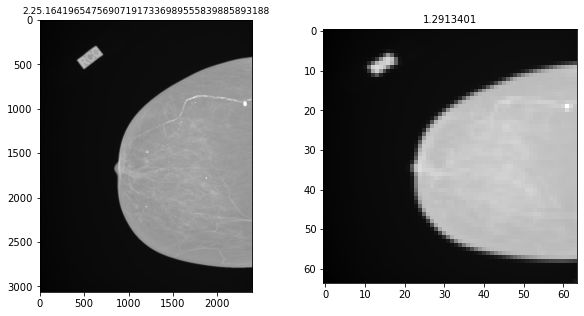

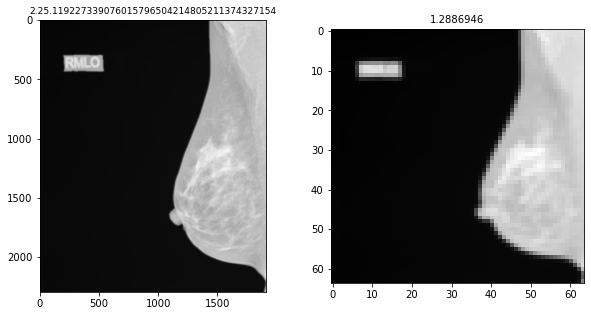

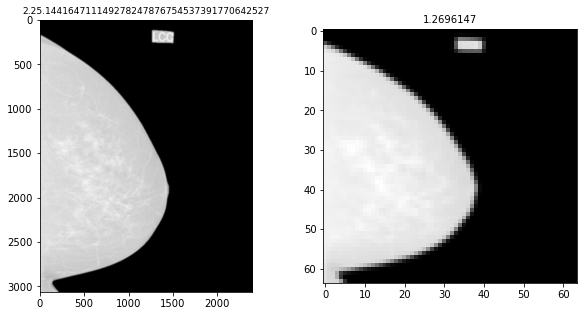

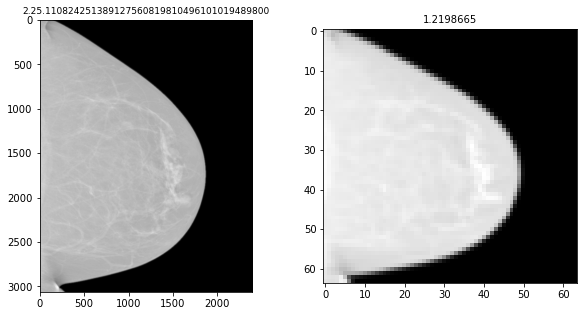

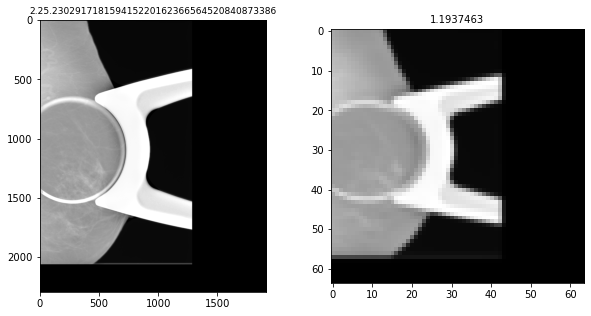

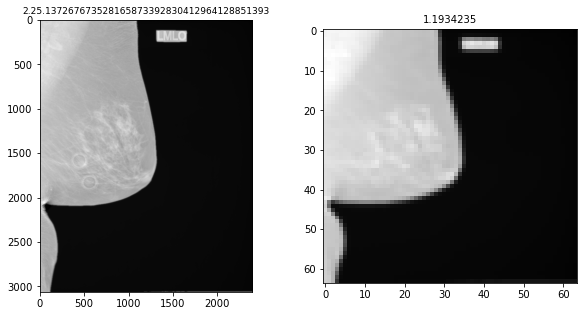

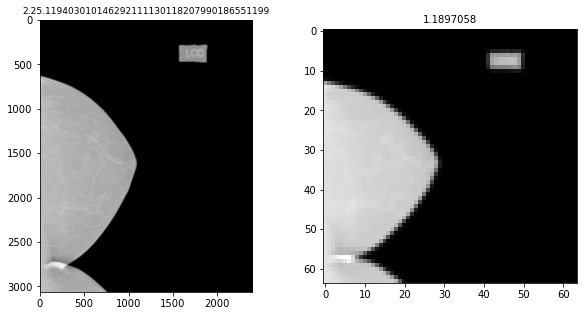

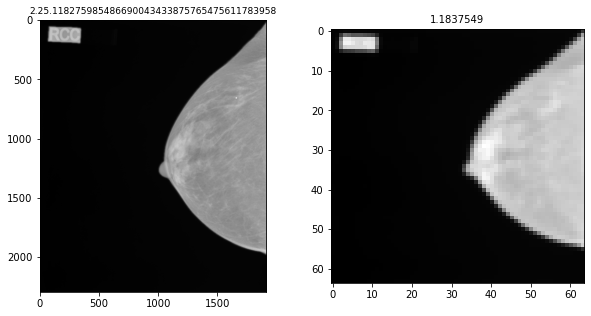

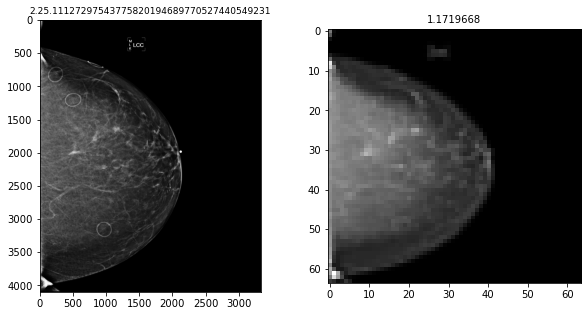

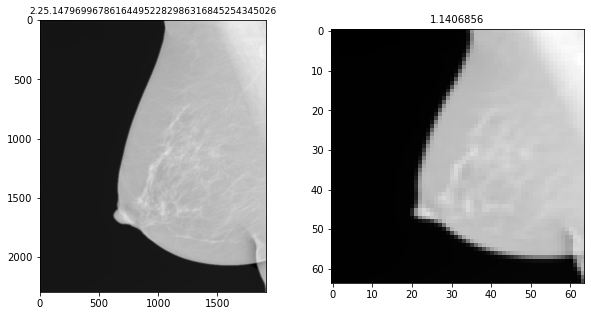

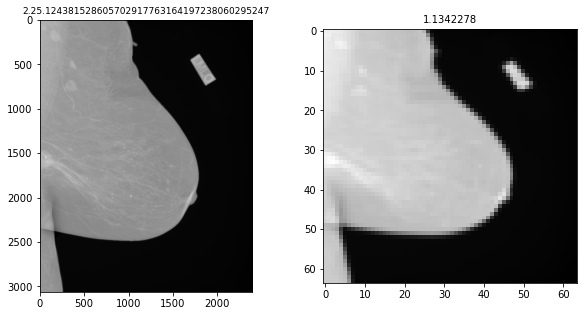

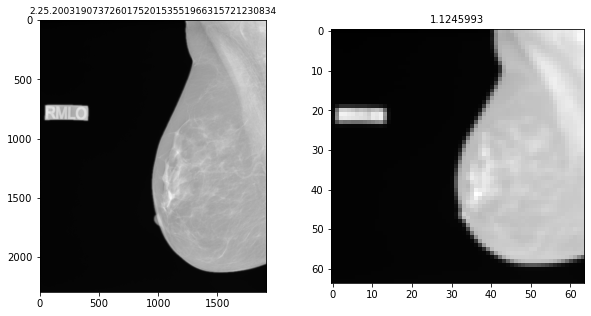

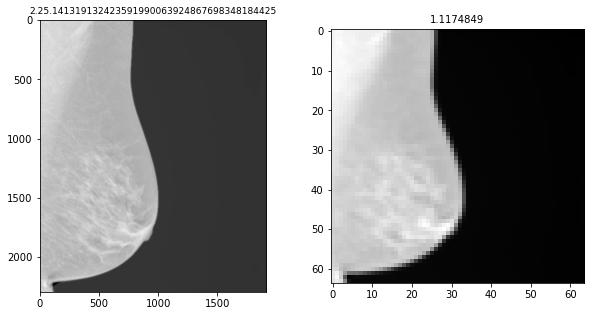

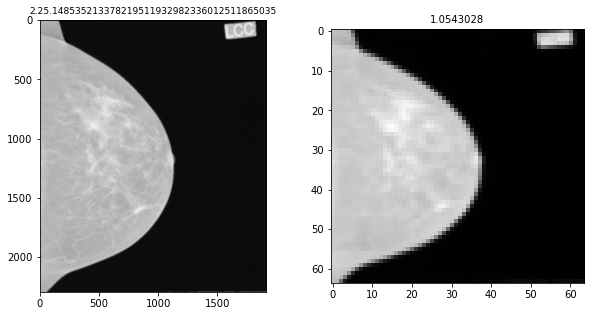

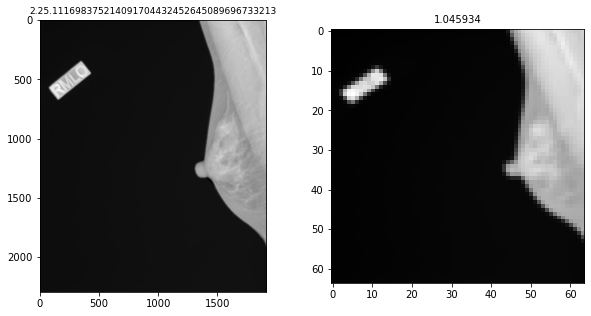

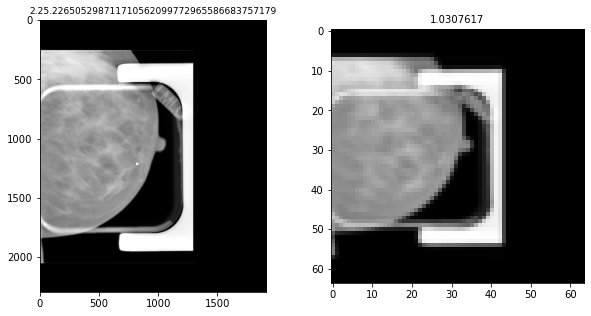

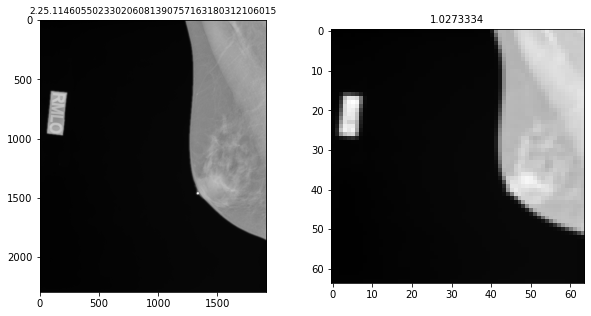

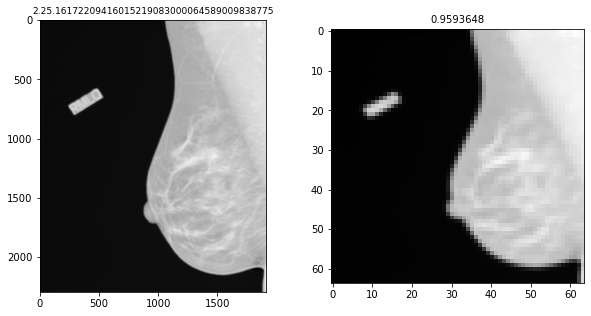

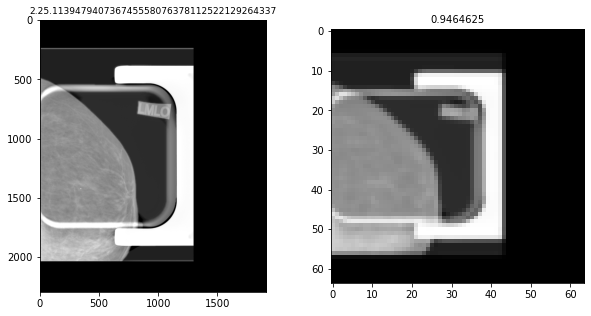

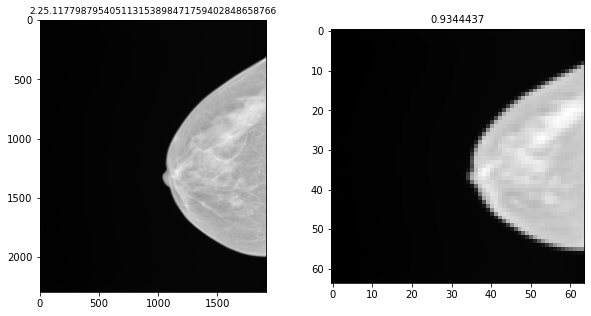

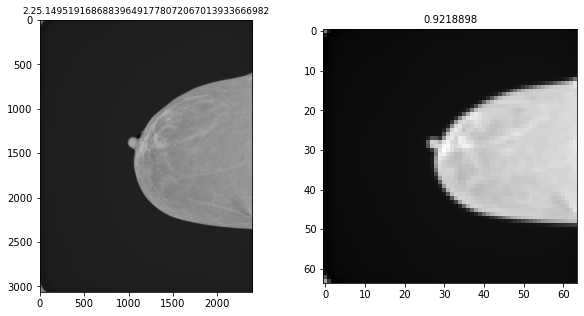

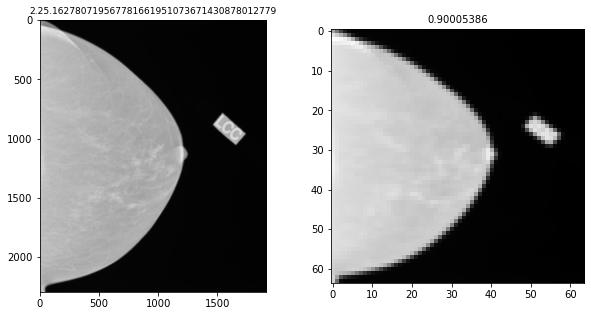

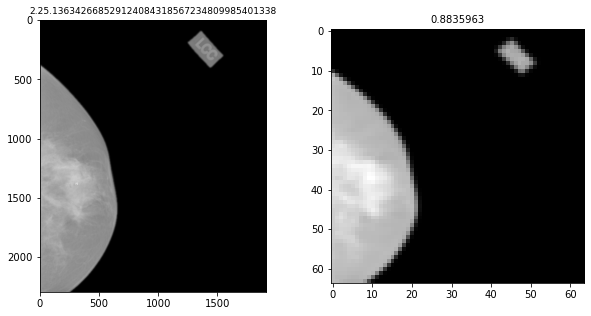

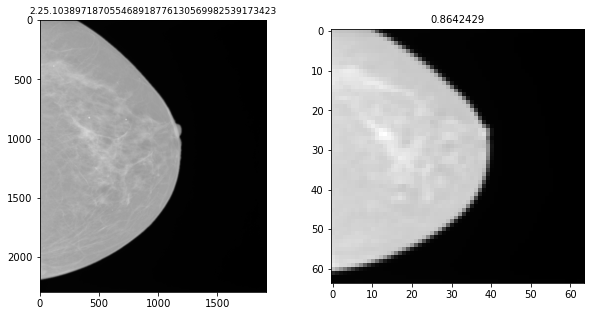

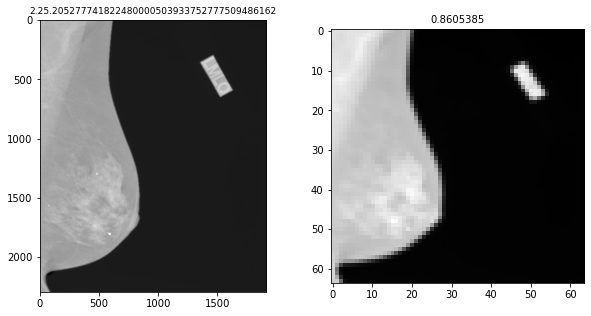

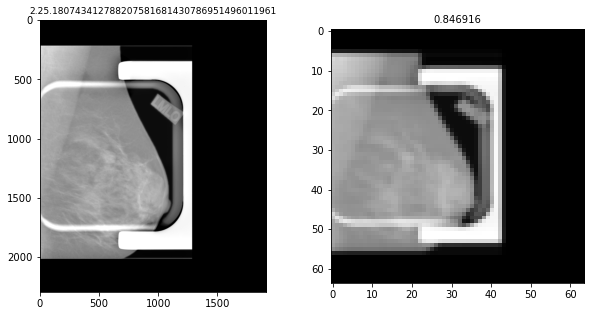

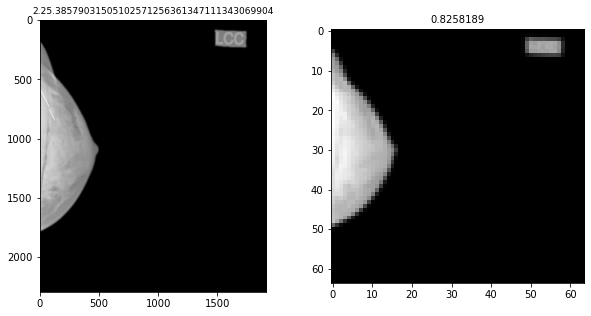

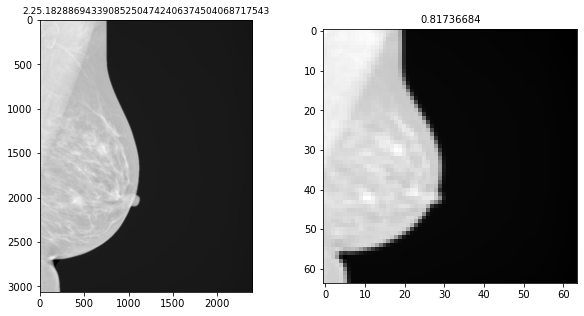

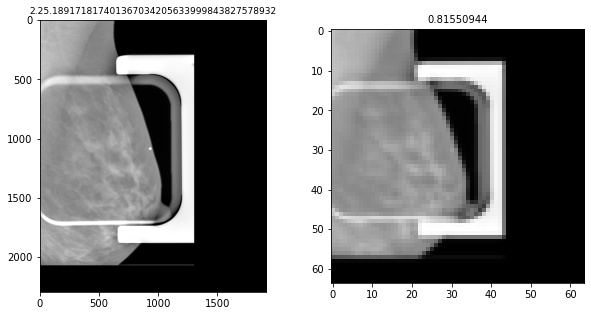

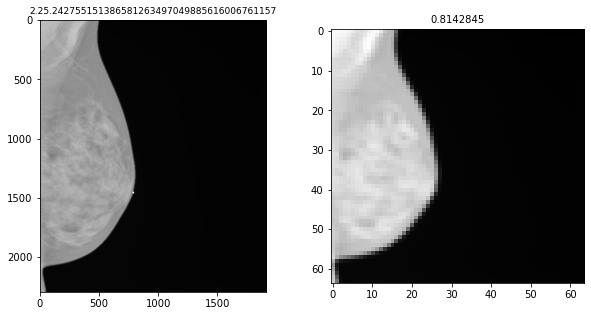

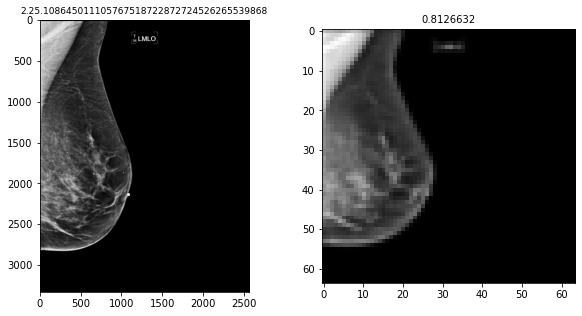

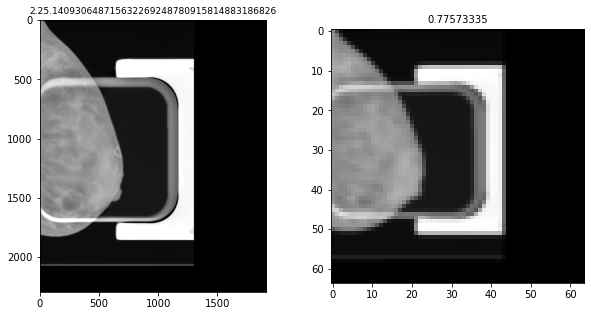

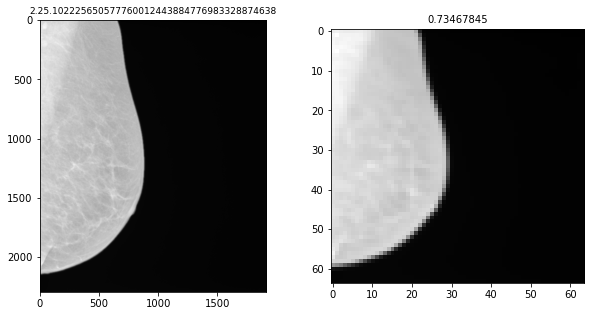

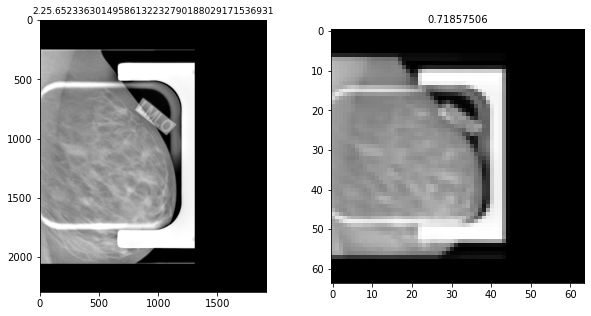

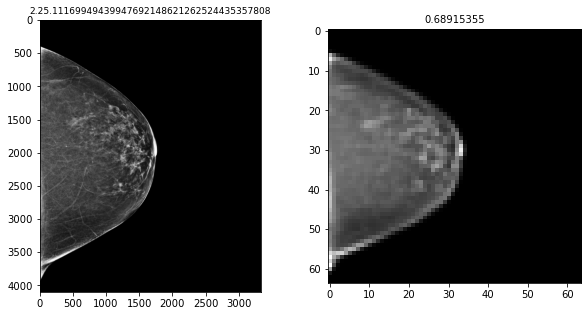

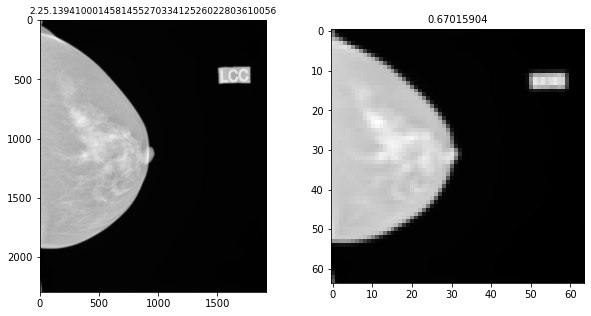

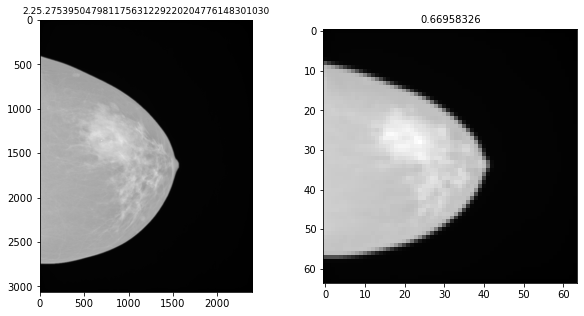

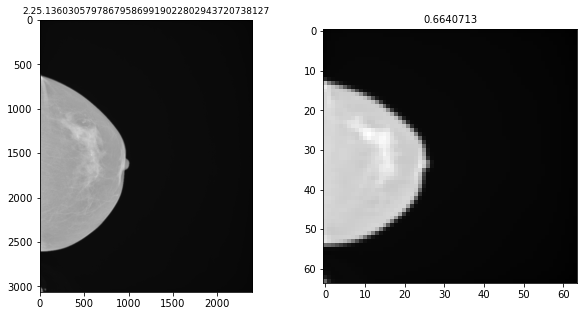

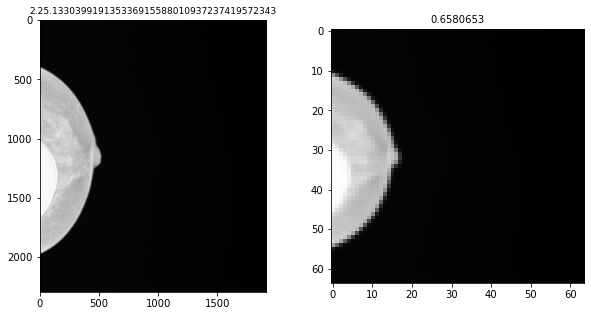

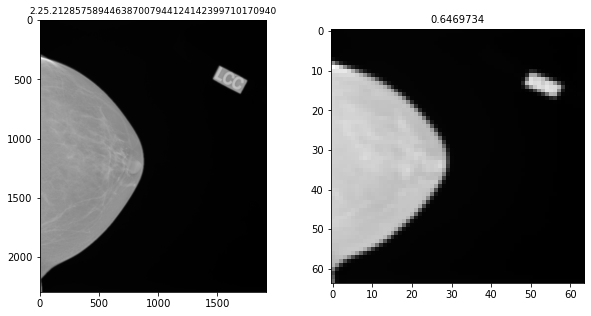

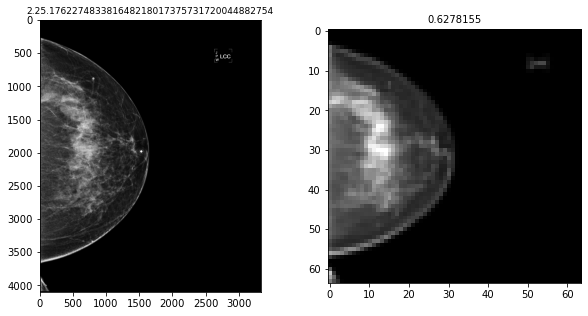

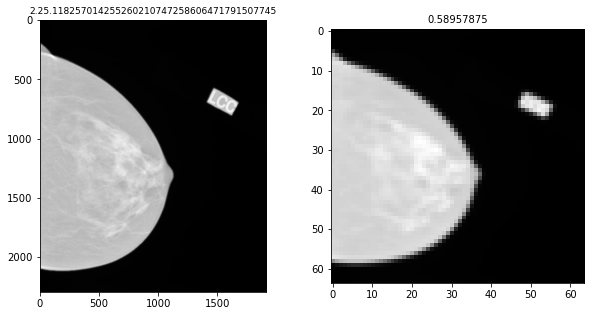

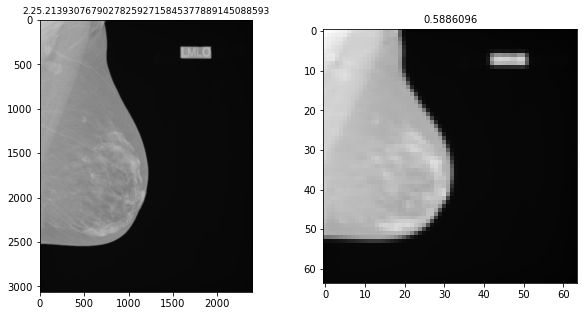

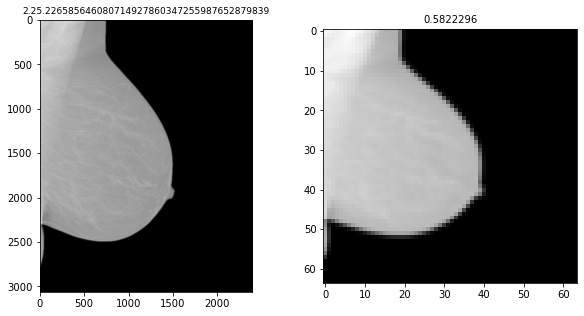

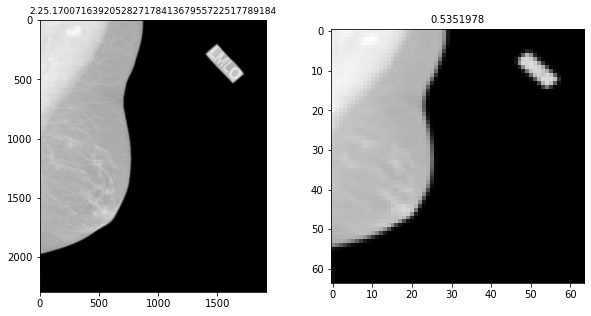

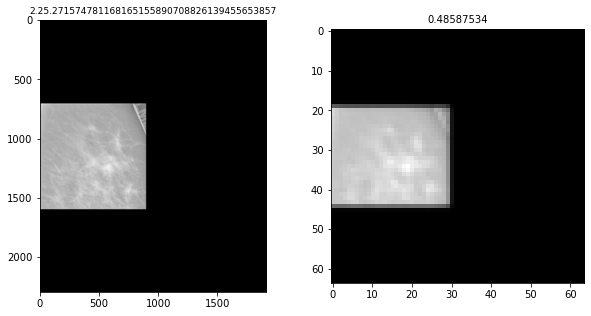

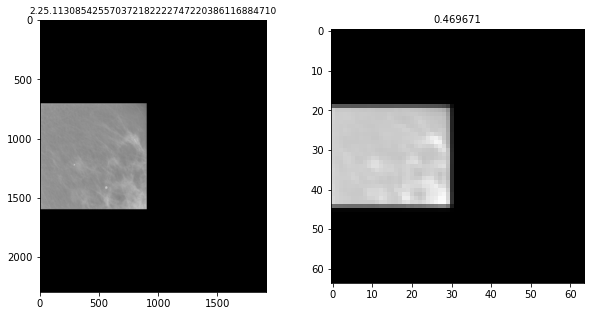

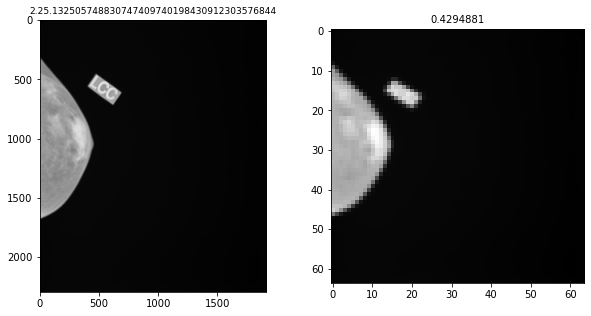

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='DeepSVDD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])